In [ ]:
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import math
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
sns.set_theme(palette='husl')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
p = pd.read_pickle('/content/drive/MyDrive/Colab_Notebooks/AI4Good_Project/model2data.pkl')
data = pd.DataFrame.from_dict(p)
data

,text,depression,mental_illness,anxiety,no_mi,adhd,text_clean,target_encoded
0,Today in Selfcare: beauty &amp; laughs Kung Fu...,0.0,neither,0.0,0.0,0.0,today selfcar beauti amp laugh kung fu panda ...,3
1,I get to spend New Year's home again alone and...,1.0,depression,0.0,0.0,0.0,get spend new year home alon lone •,2
2,"Depressed and lonely /: Stuck in a deep, never...",1.0,depression,0.0,0.0,0.0,depress lone stuck deep never end hole,2
3,If this is your response to someone saying the...,0.0,neither,0.0,0.0,0.0,respons someon say theyr deal your terribl pe...,3
4,Apparently you get a free pass just by mention...,0.0,neither,0.0,0.0,0.0,appar get free pass mention free badg day,3
...,...,...,...,...,...,...,...,...
155937,"Same, and I also had the added benefit of a ma...",0.0,adhd,0.0,0.0,1.0,also ad benefit massiv reduct anxieti yesterda...,0
155938,This happens to me whenever I don’t sleep enou...,0.0,adhd,0.0,0.0,1.0,happen whenev don't sleep enough eat take med,0
155939,I'm so sorry. This is exactly what I'm scared ...,0.0,adhd,0.0,0.0,1.0,sorri exact scare happen go med know would qui...,0
155940,i actually can afford my meds? 60 pills is 20 ...,0.0,adhd,0.0,0.0,1.0,actual afford med pill dollar live keep get ...,0


In [ ]:
data['mental_illness'].value_counts()

depression    48622
anxiety       35484
neither       20684
adhd          20580
Name: mental_illness, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


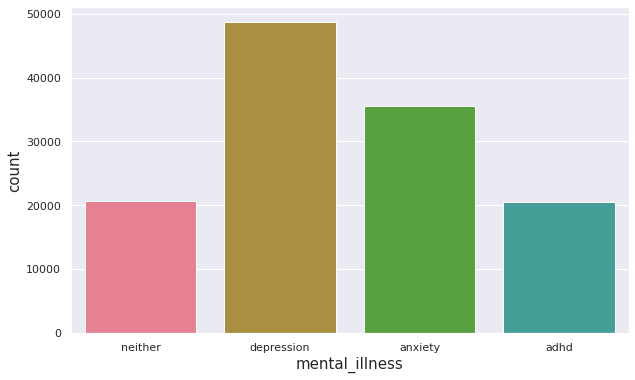

In [ ]:
plt.figure(figsize=(10,6))

plt.xlabel('mental illness', fontsize=15)
plt.ylabel('counts', fontsize=15)

sns.countplot(data['mental_illness'])

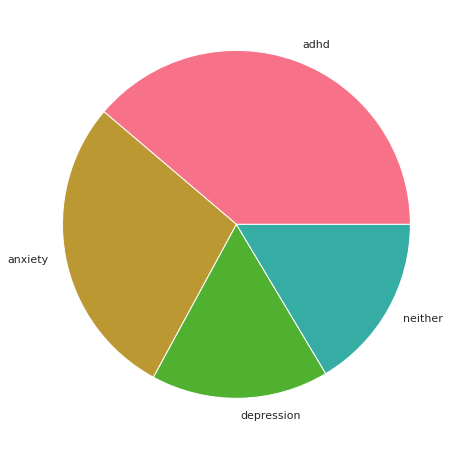

In [ ]:
y = np.array(data['mental_illness'].value_counts())
mylabels = ['adhd', 'anxiety', 'depression', 'neither']
plt.figure(figsize=(8,8))

plt.pie(y, labels = mylabels)
plt.show() 

In [ ]:
#check if null values
data.isna().sum()

text              0
depression        0
mental_illness    0
anxiety           0
no_mi             0
adhd              0
text_clean        0
target_encoded    0
dtype: int64

In [ ]:
#further clean text to get rid of emojis, symbols etc
# function is from: https://www.kaggle.com/code/oknashar/emotion-detection-deep-learning
import re
def remove_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    return text
def remove_emojis(text):
    text = [x for x in text.split(' ') if x.isalpha()]
    text = ' '.join(text)
    return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text
def preprocess(text):
    text = remove_hashtags(text)
    text = remove_emoji(text)
    text = remove_urls(text)
    return text

data['text_clean'] = data['text_clean'].apply(preprocess)

In [ ]:
words = list()
for i in data['text_clean']:
    for j in i.split(' '):
        words.append(j)

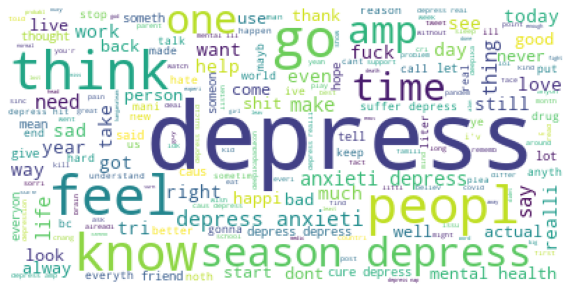

In [ ]:
#wordcloud for depression 
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
plt.figure(figsize=(10,10))
wc.generate(' '.join(text for text in data.loc[data['mental_illness'] == 'depression', 'text_clean']))
plt.imshow(wc)
plt.axis("off")
plt.show()

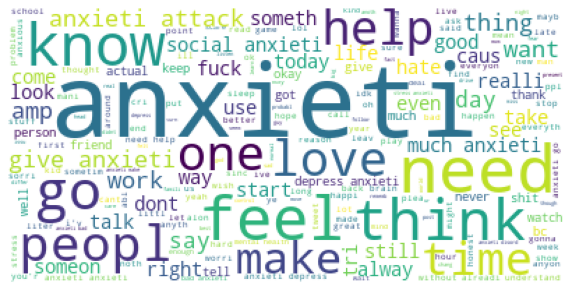

In [ ]:
#wordcloud for anxiety
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)

plt.figure(figsize=(10,10))
wc.generate(' '.join(text for text in data.loc[data['mental_illness'] == 'anxiety', 'text_clean']))
plt.imshow(wc)
plt.axis("off")
plt.show()

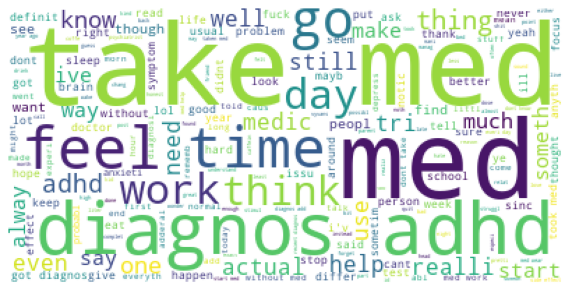

In [ ]:
#wordcloud for adhd
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in data.loc[data['mental_illness'] == 'adhd', 'text_clean']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

### Random forest

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


#### **Set up data + seed**

In [ ]:
seed = 0

In [ ]:
# referenced code from: https://www.kaggle.com/code/ayu1391994/nlp-using-random-forest/script

#### **Training a new RF model:**

In [ ]:
corpus = []
for i in range(0,data.shape[0]):
    review = data['text_clean'].iloc[i]
    review = review.split() #convert into list
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# convert data to vectors 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features = 5000)
X_preprocessed = cv.fit_transform(corpus)

X = X_preprocessed.toarray()
y = data['target_encoded'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=seed)

In [ ]:
#check split
# code reference: https://github.com/emiburns/text_analysis_of_depression_anxiety_tweets/blob/main/code/exploration/03_classification_results.ipynb
print("Number of tweets in training data: {}".format(len(X_train))) 
print("Samples per class (training): {}".format(np.bincount(y_train)))
print("Number of tweets in test data: {}".format(len(X_test))) 
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of tweets in training data: 100296
Samples per class (training): [16450 28325 38984 16537]
Number of tweets in test data: 25074
Samples per class (test): [4130 7159 9638 4147]


In [ ]:
rf_model=RandomForestClassifier(n_estimators = 300,criterion="entropy",random_state = seed)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

#### **Ger predictions & score model** 

In [ ]:
#get predictions
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn import preprocessing

le_mental_illness = preprocessing.LabelEncoder()
le_mental_illness.fit(['adhd','anxiety', 'depression', 'neither'])


save_model = {'model' : rf_model, 'le_mental_illness' : le_mental_illness, 'corpus' : corpus}
with open('/content/drive/MyDrive/Colab_Notebooks/AI4Good_Project/mental_illness_rf_final.pkl', 'wb') as fid2:
    pickle.dump(save_model, fid2) 

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

#classification report
from sklearn import metrics
class_report = metrics.classification_report(y_test, y_pred)
print(class_report)

#rf validation score
print('rf validation score is ', rf_model.score(X_test, y_test))

#f1 score
# print('rf f1 score is is ', f1_score(y_test, y_pred))

#accuracy
print('rf accuracy score is is ', accuracy_score(y_test, y_pred))


[[4037   24   50   19]
 [  35 6308  400  416]
 [  48  106 9121  363]
 [   8  211  109 3819]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4130
           1       0.95      0.88      0.91      7159
           2       0.94      0.95      0.94      9638
           3       0.83      0.92      0.87      4147

    accuracy                           0.93     25074
   macro avg       0.92      0.93      0.93     25074
weighted avg       0.93      0.93      0.93     25074

rf validation score is  0.9286511924702879
rf accuracy score is is  0.9286511924702879


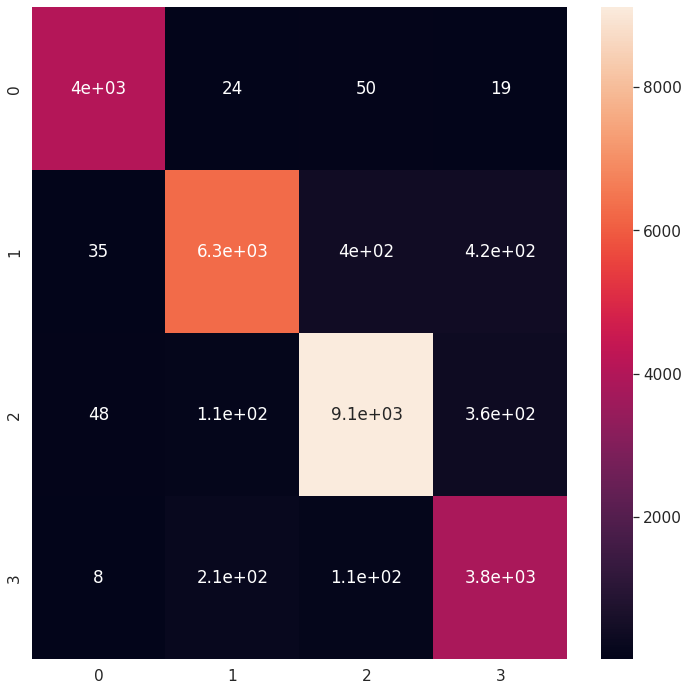

In [ ]:
plt.figure(figsize=(12,12))
cm = pd.DataFrame(conf_matrix, range(4), range(4))
sns.heatmap(cm, annot=True)

plt.show()

In [ ]:
#Inference
test1 = 'Feeling lonely and stuck in a never end hole'
test1 = preprocess(test1)
test1 = [test1]
test2 = cv.transform(test1).toarray()
z = rf_model.predict(test2)
le_mental_illness.inverse_transform(z)

array(['depression'], dtype='<U10')